# Chaotic test asteroid

Figure 3.6 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of eccentricity and semimajor axis versus time for a test-mass asteroid with initial orbital elements
$a_i=0.6984 a_\mathrm{jup}$ and $e_i=0.1967$. Distance is in units of $a_\mathrm{jup}$; time is in
units of $\mathcal{P}_\mathrm{jup}$. This plot is following plots in Murray & Dermott (1999), but we do our
own calculation of the orbits.

We use the [rebound python/C package](https://rebound.readthedocs.io) to calcuate the
orbits (Rein & Liu [2012, A&A, 537, 128](https://ui.adsabs.harvard.edu/abs/2012A%2526A...537A.128R)) in a 
separate notebook.  This version of the notebook plots the pre-computed data.  See the `rebound` folder
for the in-situ calculation and the notebook that generated the `chaoticAsteroid.txt` data file.

For this and the calculation of a quasi-periodic test asteroid in Figure 3.4, we set up a 
restricted 3-body problem of the Sun, Jupiter, and the test-mass asteroid, putting in the semimajor
axis of Jupiter and its mass in M$_\mathrm{sun}$, but setting e=0 and i=0.

In [14]:
import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings

## standard plot setup

In [15]:
plotFile = 'Fig3_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## pre-computed data

Read in the data from a pre-computed `rebound` calculation for a simple system: Sun, Jupiter, and a test asteroid with
 * $a_i$ = 0.6984 a$_{jup}$
 * $e_e$ = 0.1967

Data are in 3-column ascii text format with a commented header

In [16]:
dataFile = 'chaoticAsteroid.txt'

# data file has no text header, so use column numbers

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

tch = np.array(data['t/PJ'])
ach = np.array(data['a/aJ'])
ech = np.array(data['ecc'])

# limits

tMax = np.max(tch)

## Figure 3.6

Two panels, over/under, as follows:
 * top: e vs t
 * bottom: a vs t


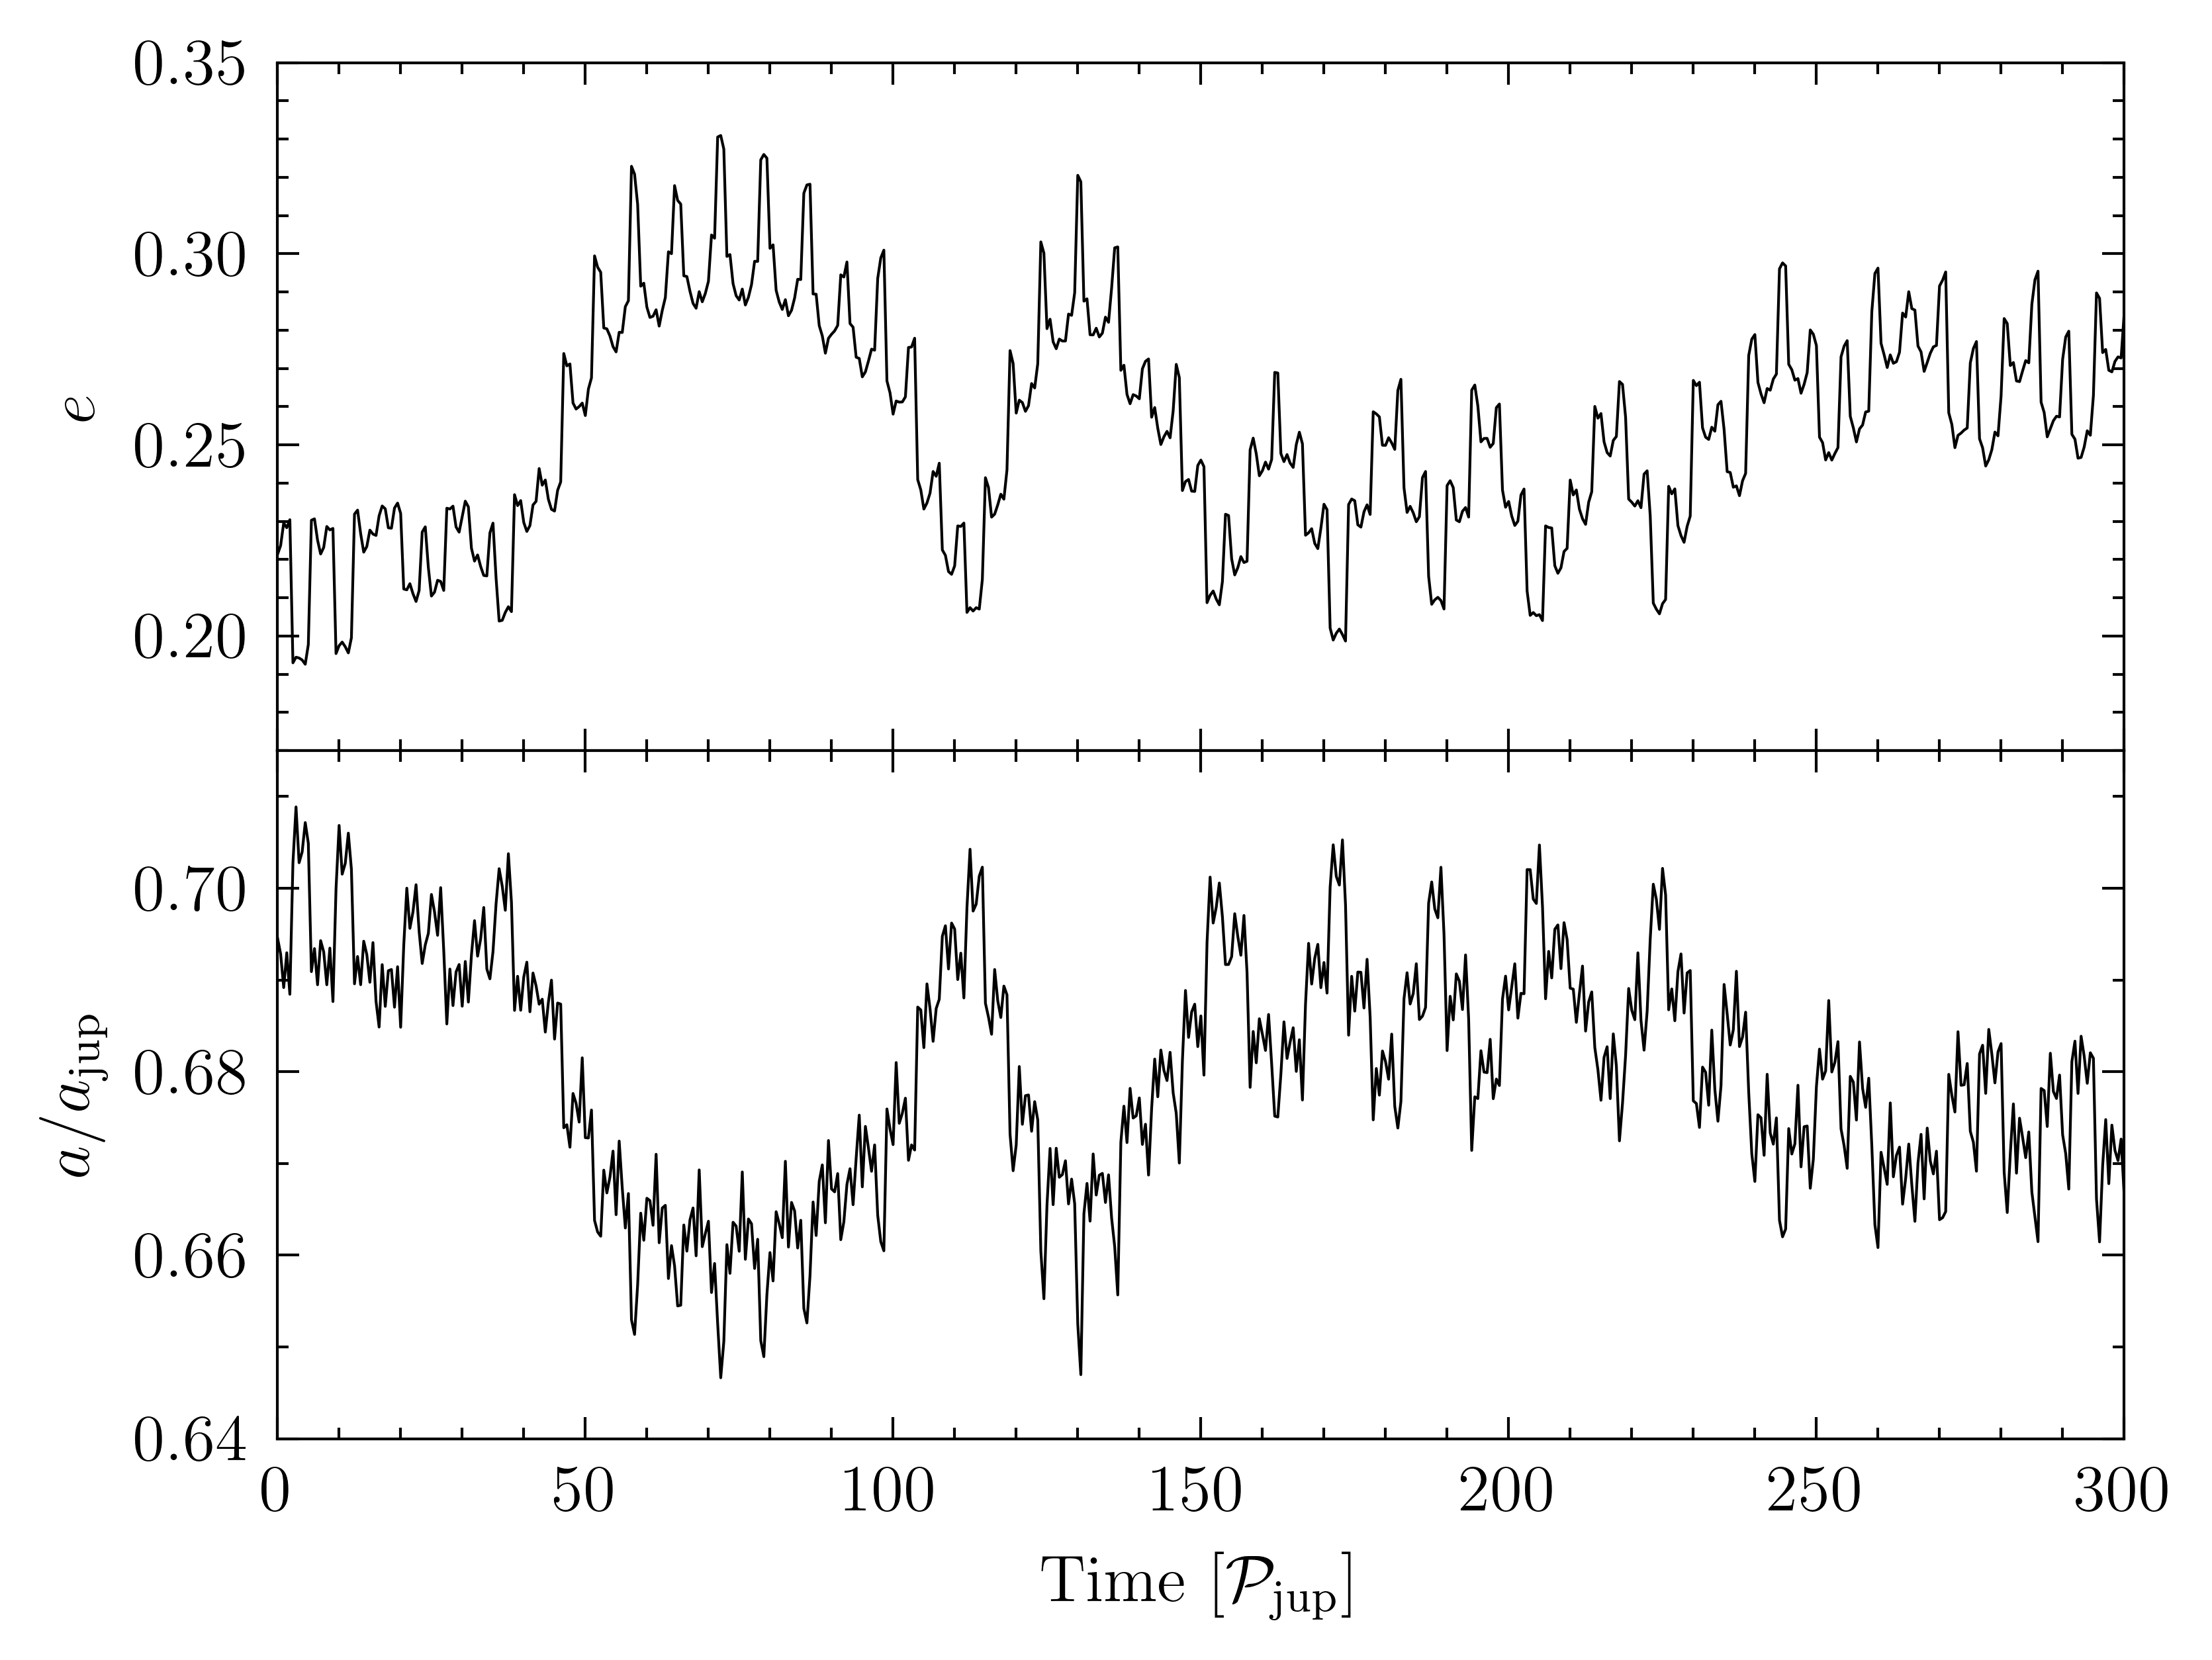

In [17]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0, hspace=0)

# panel 1 (top): eccentricity

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(0,tMax)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.set_xticklabels([])
ax1.set_ylim(0.17,0.35)
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.set_ylabel(r'$e$',fontsize=axisFontSize)

ax1.plot(tch,ech,'-',color='black',lw=0.5)

# panel 2 (bottom): semi-major axis

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(0,tMax)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.set_ylim(0.64,0.715)
ax2.yaxis.set_major_locator(MultipleLocator(0.02))
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2.set_xlabel(r'Time [$\mathcal{P}_\mathrm{jup}$]',fontsize=axisFontSize)
ax2.set_ylabel(r'$a/a_\mathrm{jup}$',fontsize=axisFontSize)

ax2.plot(tch,ach,'-',color='black',lw=0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

## Supplemental plots

Referenced in the text but not plotted is the periaspe and apoapse behavior of the asteroid during the 
period displayed in the previous cells.
 * periapse = $a(1-e)$
 * apoapse = $a(1+e)$

Note that both are in units of $a_\mathrm{jup}$.

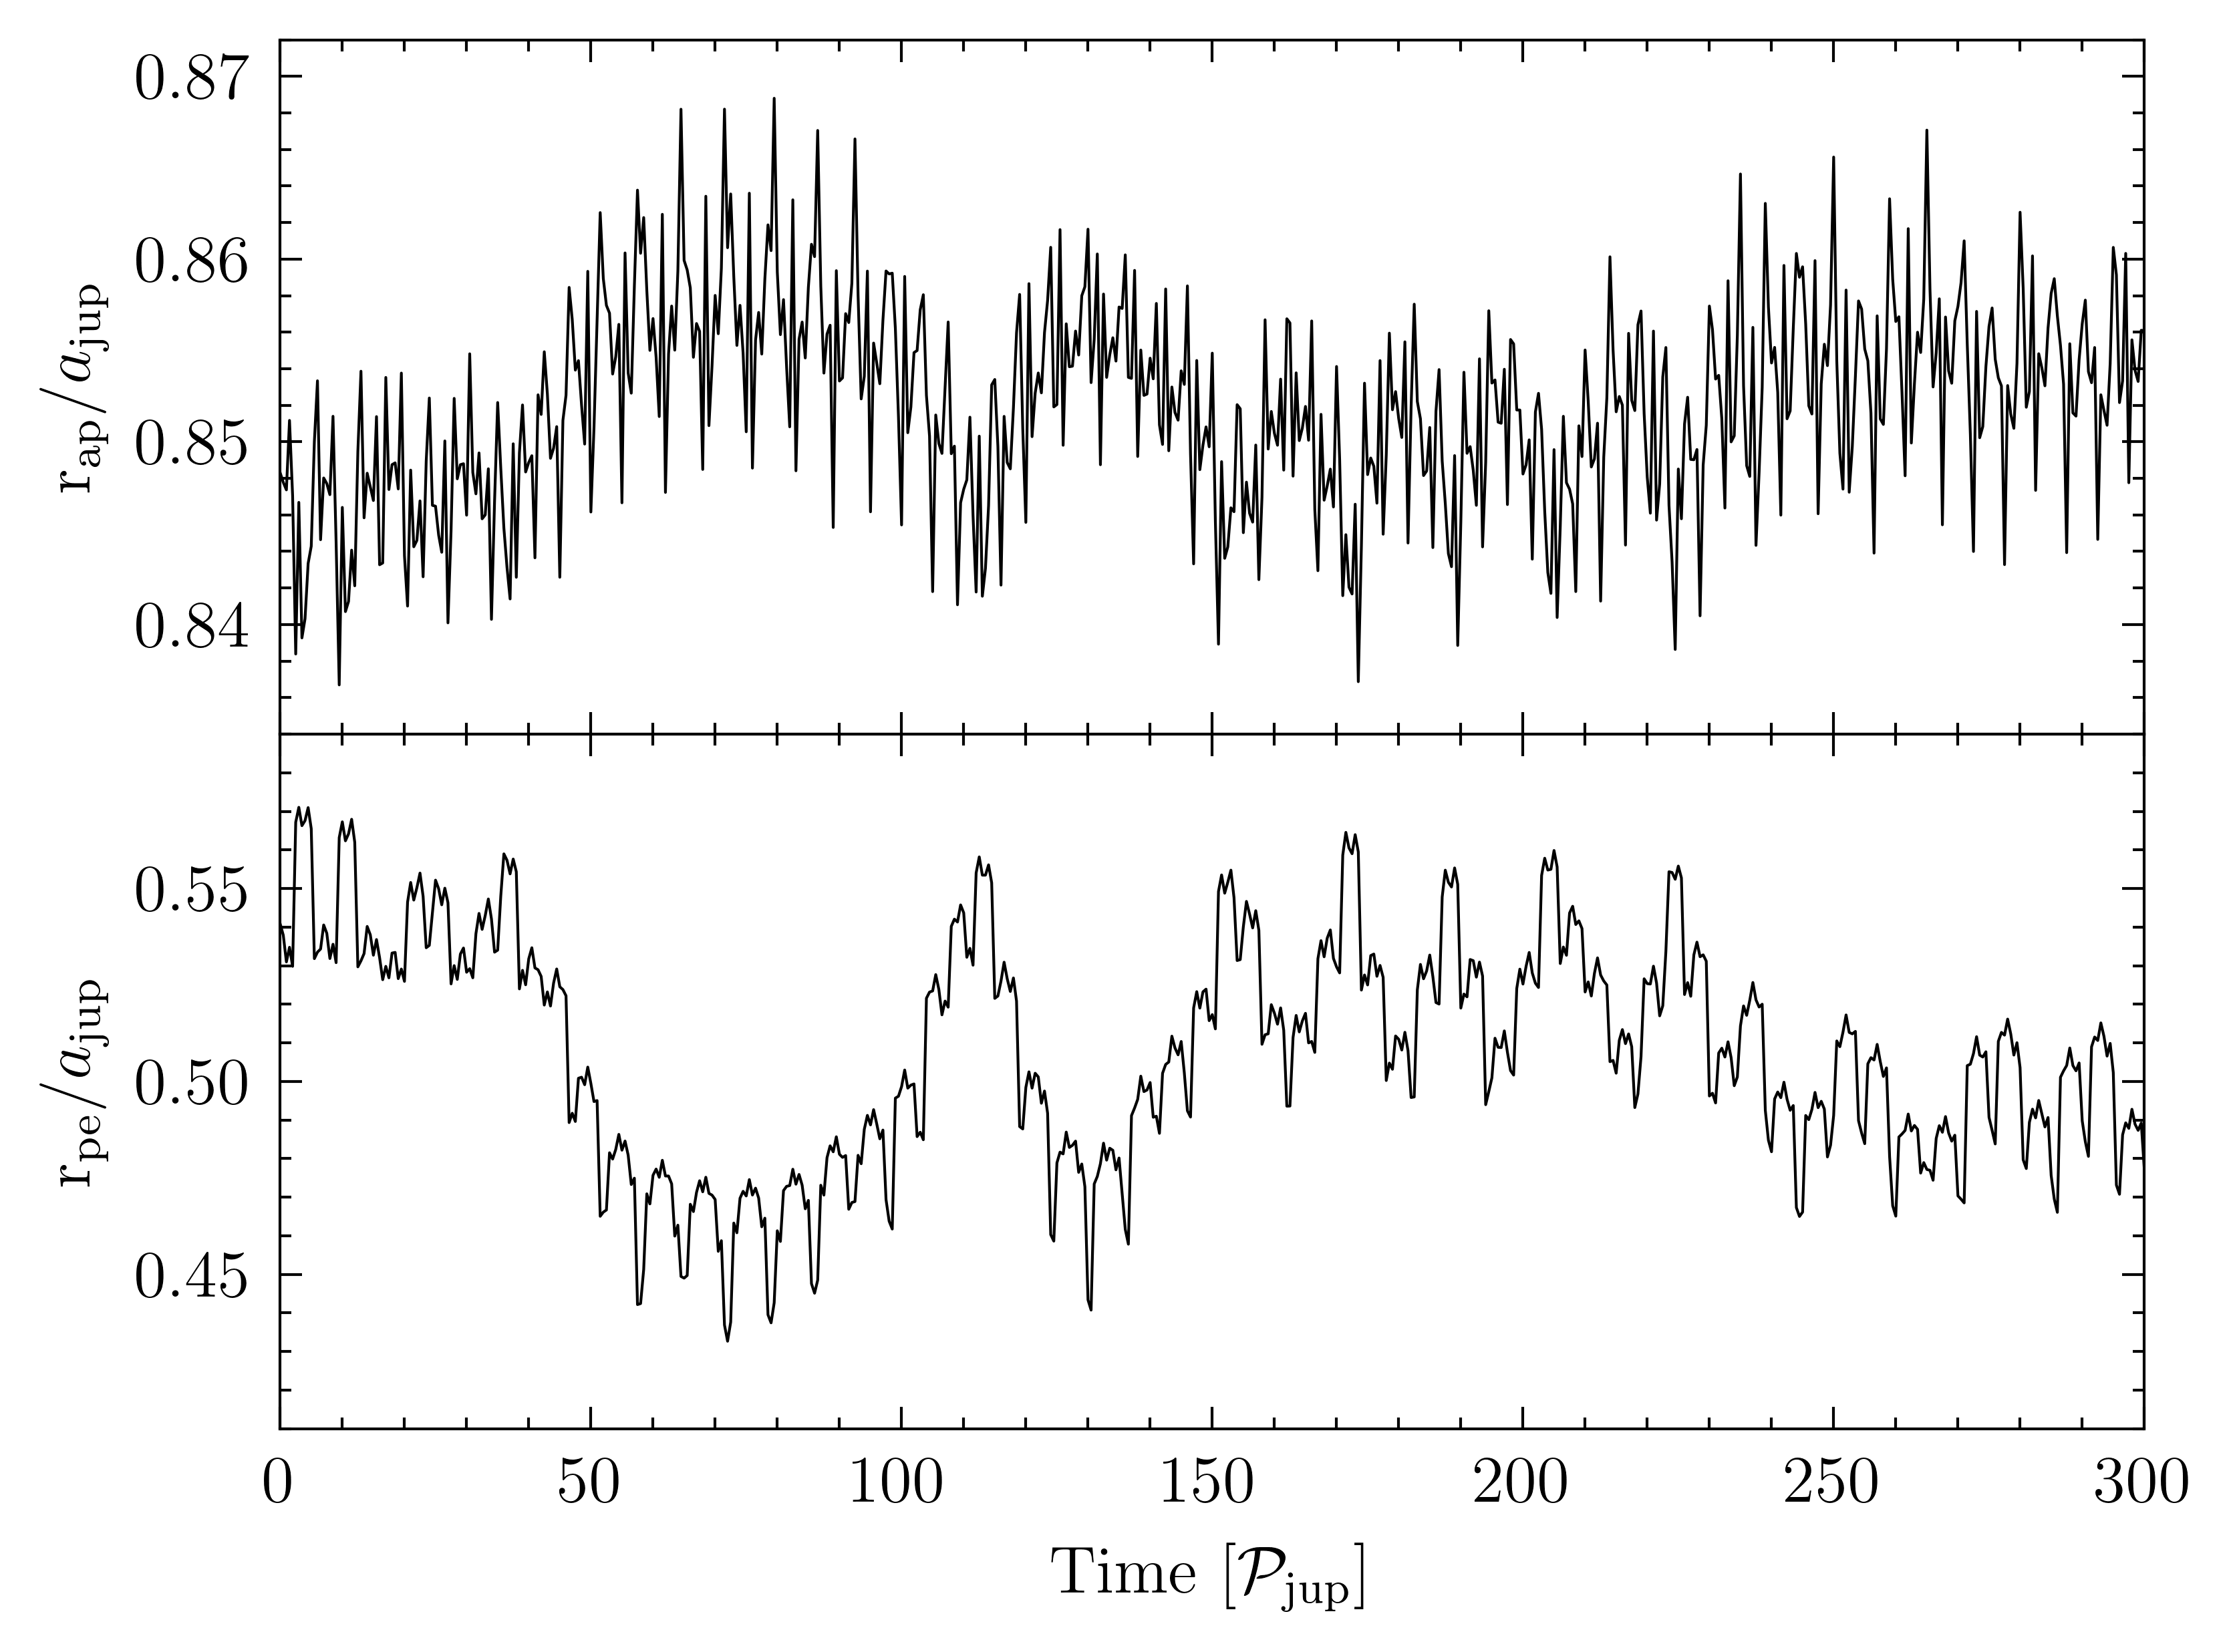

In [18]:
peri = ach*(1.0-ech)
apo = ach*(1.0+ech)

outFile = f'Fig3_6_ap.png'
makePlot = False

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0, hspace=0)

# panel 1 (top): eccentricity

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(0,tMax)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.set_xticklabels([])
ax1.set_ylim(0.834,0.872)
ax1.yaxis.set_major_locator(MultipleLocator(0.01))
ax1.yaxis.set_minor_locator(MultipleLocator(0.002))
ax1.set_ylabel(r'r$_\mathrm{ap}/a_\mathrm{jup}$',fontsize=axisFontSize)

ax1.plot(tch,apo,'-',color='black',lw=0.5)

# panel 2 (bottom): semi-major axis

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(0,tMax)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.set_ylim(0.41,0.59)
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2.set_xlabel(r'Time [$\mathcal{P}_\mathrm{jup}$]',fontsize=axisFontSize)
ax2.set_ylabel(r'r$_\mathrm{pe}/a_\mathrm{jup}$',fontsize=axisFontSize)

ax2.plot(tch,peri,'-',color='black',lw=0.5)

plt.plot()
if makePlot:
    plt.savefig(outFile,bbox_inches='tight',facecolor='white')